<a href="https://colab.research.google.com/github/Vanluan39/baitap_AL_week4/blob/main/baitap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


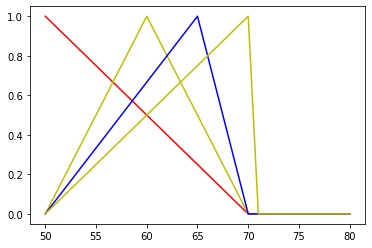

In [ ]:
import numpy as np
import skfuzzy as fuzzy
import matplotlib.pyplot as plt

x= np.arange(50,81,1)
slow = fuzzy.trimf(x,[50,50,70])
medium = fuzzy.trimf(x,[50,60,70])
medium_fast = fuzzy.trimf(x,[50,65,70])
full_speed = fuzzy.trimf(x,[50,70,70])

plt.figure()
plt.plot(x,slow,'r',linewidth=1.5,label='slow')
plt.plot(x,medium,'y',linewidth=1.5,label='medium')
plt.plot(x,medium_fast,'b',linewidth=1.5,label='medium_fast')
plt.plot(x,full_speed,'y',linewidth=1.5,label='full_speed')




17.48319672131148


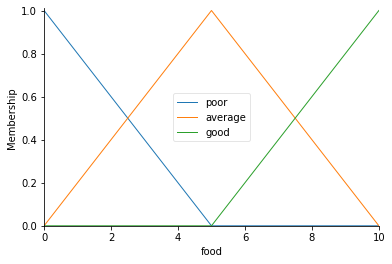

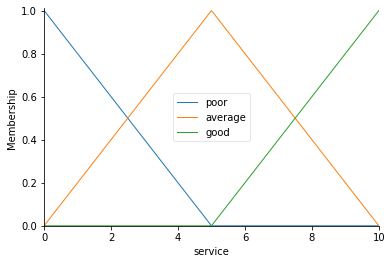

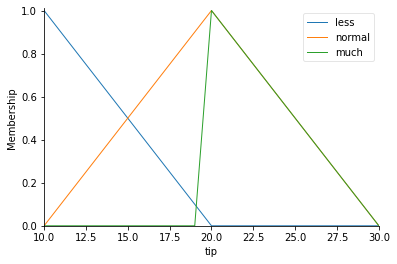

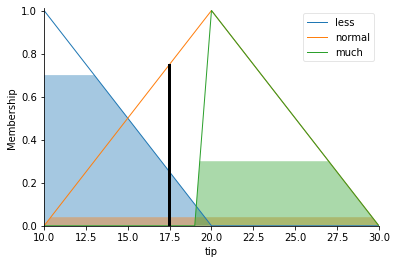

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

food= ctrl.Antecedent(np.arange(0,11,1),'food')
service= ctrl.Antecedent(np.arange(0,11,1),'service')
tip= ctrl.Consequent(np.arange(10,31,1),'tip')

food['poor'] = fuzz.trimf(food.universe,[0,0,5])
food['average'] = fuzz.trimf(food.universe,[0,5,10])
food['good'] = fuzz.trimf(food.universe,[5,10,10])

service['poor'] = fuzz.trimf(service.universe,[0,0,5])
service['average'] = fuzz.trimf(service.universe,[0,5,10])
service['good'] = fuzz.trimf(service.universe,[5,10,10])

tip['less'] = fuzz.trimf(tip.universe,[0,10,20])
tip['normal'] = fuzz.trimf(tip.universe,[10,20,30])
tip['much'] = fuzz.trimf(tip.universe,[20,20,30])

food.view()
service.view()
tip.view()

rule1=ctrl.Rule(food['poor']&service['poor'],tip['less'])
rule2=ctrl.Rule(food['good']&service['poor'],tip['normal'])
rule3=ctrl.Rule(food['average']&service['poor'],tip['normal'])

rule4=ctrl.Rule(food['poor']&service['good'],tip['normal'])
rule5=ctrl.Rule(food['good']&service['good'],tip['much'])
rule6=ctrl.Rule(food['average']&service['good'],tip['less'])

rule7=ctrl.Rule(food['poor']&service['average'],tip['normal'])
rule8=ctrl.Rule(food['good']&service['average'],tip['normal'])
rule9=ctrl.Rule(food['average']&service['average'],tip['normal'])

#
tipping_ctrl= ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping= ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food']=6.5
tipping.input['service']=9.8
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)





In [6]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
time = ctrl.Antecedent(np.arange(10,181,1),"time")
rice = ctrl.Antecedent(np.arange(100,2001,1),"rice")
power = ctrl.Consequent(np.arange(0,101,1),"power")

time['veryfast']= fuzz.trimf(time.universe,[10,10,20])
time['fast']= fuzz.trimf(time.universe,[10,20,30])
time['normal']=fuzz.trimf(time.universe,[20,40,120])
time['slow']= fuzz.trimf(time.universe,[40,70,170])
time['veryslow']= fuzz.trimf(time.universe,[50,110,1750])

rice['verylow']= fuzz.trimf(rice.universe,[0,50,100])
rice['low']= fuzz.trimf(rice.universe,[50,160,300])
rice['normal']= fuzz.trimf(rice.universe,[180,400,600])
rice['much']= fuzz.trimf(rice.universe,[550,750,1600])
rice['verymuch']= fuzz.trimf(rice.universe,[700,1300,2000])

power['verylow']= fuzz.trimf(power.universe,[0,10,20])
power['low']= fuzz.trimf(power.universe,[10,20,30])
power['normal']= fuzz.trimf(power.universe,[25,40,60])
power['high']= fuzz.trimf(power.universe,[40,60,90])
power['veryhigh']= fuzz.trimf(power.universe,[70,90,100])

time.view()
rice.view()
power.view()



rule1 = ctrl.Rule(time['veryslow']&rice['verylow'],power['verylow']) 
rule2 = ctrl.Rule(time['veryslow']&rice['low'],power['low'])  
rule3 = ctrl.Rule(time['veryslow']&rice['normal'],power['low'])
rule4 = ctrl.Rule(time['veryslow']&rice['much'],power['high'])
rule5 = ctrl.Rule(time['veryslow']&rice['verymuch'],power['veryhigh'])

rule6 = ctrl.Rule(time['slow']&rice['verylow'],power['low'])
rule7 = ctrl.Rule(time['slow']&rice['low'],power['low'])
rule8 = ctrl.Rule(time['slow']&rice['normal'],power['normal'])
rule9 = ctrl.Rule(time['slow']&rice['much'],power['high'])
rule10 = ctrl.Rule(time['slow']&rice['verymuch'],power['high'])

rule11 = ctrl.Rule(time['normal']&rice['verylow'],power['normal'])
rule12 = ctrl.Rule(time['normal']&rice['low'],power['normal'])
rule13 = ctrl.Rule(time['normal']&rice['normal'],power['normal'])
rule14 = ctrl.Rule(time['normal']&rice['much'],power['high'])
rule15 = ctrl.Rule(time['normal']&rice['verymuch'],power['high'])

rule16 = ctrl.Rule(time['fast']&rice['verylow'],power['high'])
rule17 = ctrl.Rule(time['fast']&rice['low'],power['high'])
rule18 = ctrl.Rule(time['fast']&rice['normal'],power['high'])
rule19 = ctrl.Rule(time['fast']&rice['much'],power['high'])
rule20 = ctrl.Rule(time['fast']&rice['verymuch'],power['veryhigh'])

rule21 = ctrl.Rule(time['veryfast']&rice['verylow'],power['veryhigh'])
rule22 = ctrl.Rule(time['veryfast']&rice['low'],power['veryhigh'])
rule23 = ctrl.Rule(time['veryfast']&rice['normal'],power['high'])
rule24 = ctrl.Rule(time['veryfast']&rice['much'],power['veryhigh'])
rule25 = ctrl.Rule(time['veryfast']&rice['verymuch'],power['veryhigh'])


powering_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
powering  = ctrl.ControlSystemSimulation(powering_ctrl)
powering.input['time']=50
powering.input['rice']=1500
powering .compute()
print(powering.output['power'])
power.view(sim=powering)


ModuleNotFoundError: ignored